In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용




--- 
 - 클래스로 파이토치 모델 구현하기 
   - 파이토치의 대부분의 구현체들은 대부분 모델을 생성할 때 클래스(Class)를 사용하고 있습니다. 
   - 앞서 배운 선형 회귀를 클래스로 구현해보겠습니다. 
   - 앞서 구현한 코드와 다른 점은 오직 클래스로 모델을 구현했다는 점입니다. 


-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 0.539713 
accuracy : 0.83 
model : 
    BinaryClassifier( 
      (linear): Linear(in_features=2, out_features=1, bias=True) 
      (sigmoid): Sigmoid() 
    )  
    torch.Size([1, 2]) tensor([[ 0.5630, -0.3349]]) 
    torch.Size([1]) tensor([-0.2291]) 

-------------------------------------------------------------------------------- 
epoch :   10/1000 
cost : 0.614853 
accuracy : 0.67 
model : 
    BinaryClassifier( 
      (linear): Linear(in_features=2, out_features=1, bias=True) 
      (sigmoid): Sigmoid() 
    )  
    torch.Size([1, 2]) tensor([[ 1.8139, -0.4193]]) 
    torch.Size([1]) tensor([-1.1604]) 

-------------------------------------------------------------------------------- 
epoch :   20/1000 
cost : 0.441875 
accuracy : 0.67 
model : 
    BinaryClassifier( 
      (linear): Linear(in_features=2, out_features=1, bias=True) 
      (sigmoid): Sigmoid() 
    )  
    tor

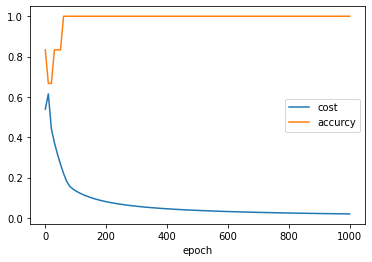

In [2]:


class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        res = self.sigmoid(
            self.linear(
                x
            )
        )

        return res


torch.manual_seed(1)

model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=1)
nb_epoches = 1000

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy, model)

mu.plt_show()